In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("Mall_Customers.csv")

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.isnull().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [21]:
!pip install missingno

EDA

In [22]:
import missingno as msno

<Axes: >

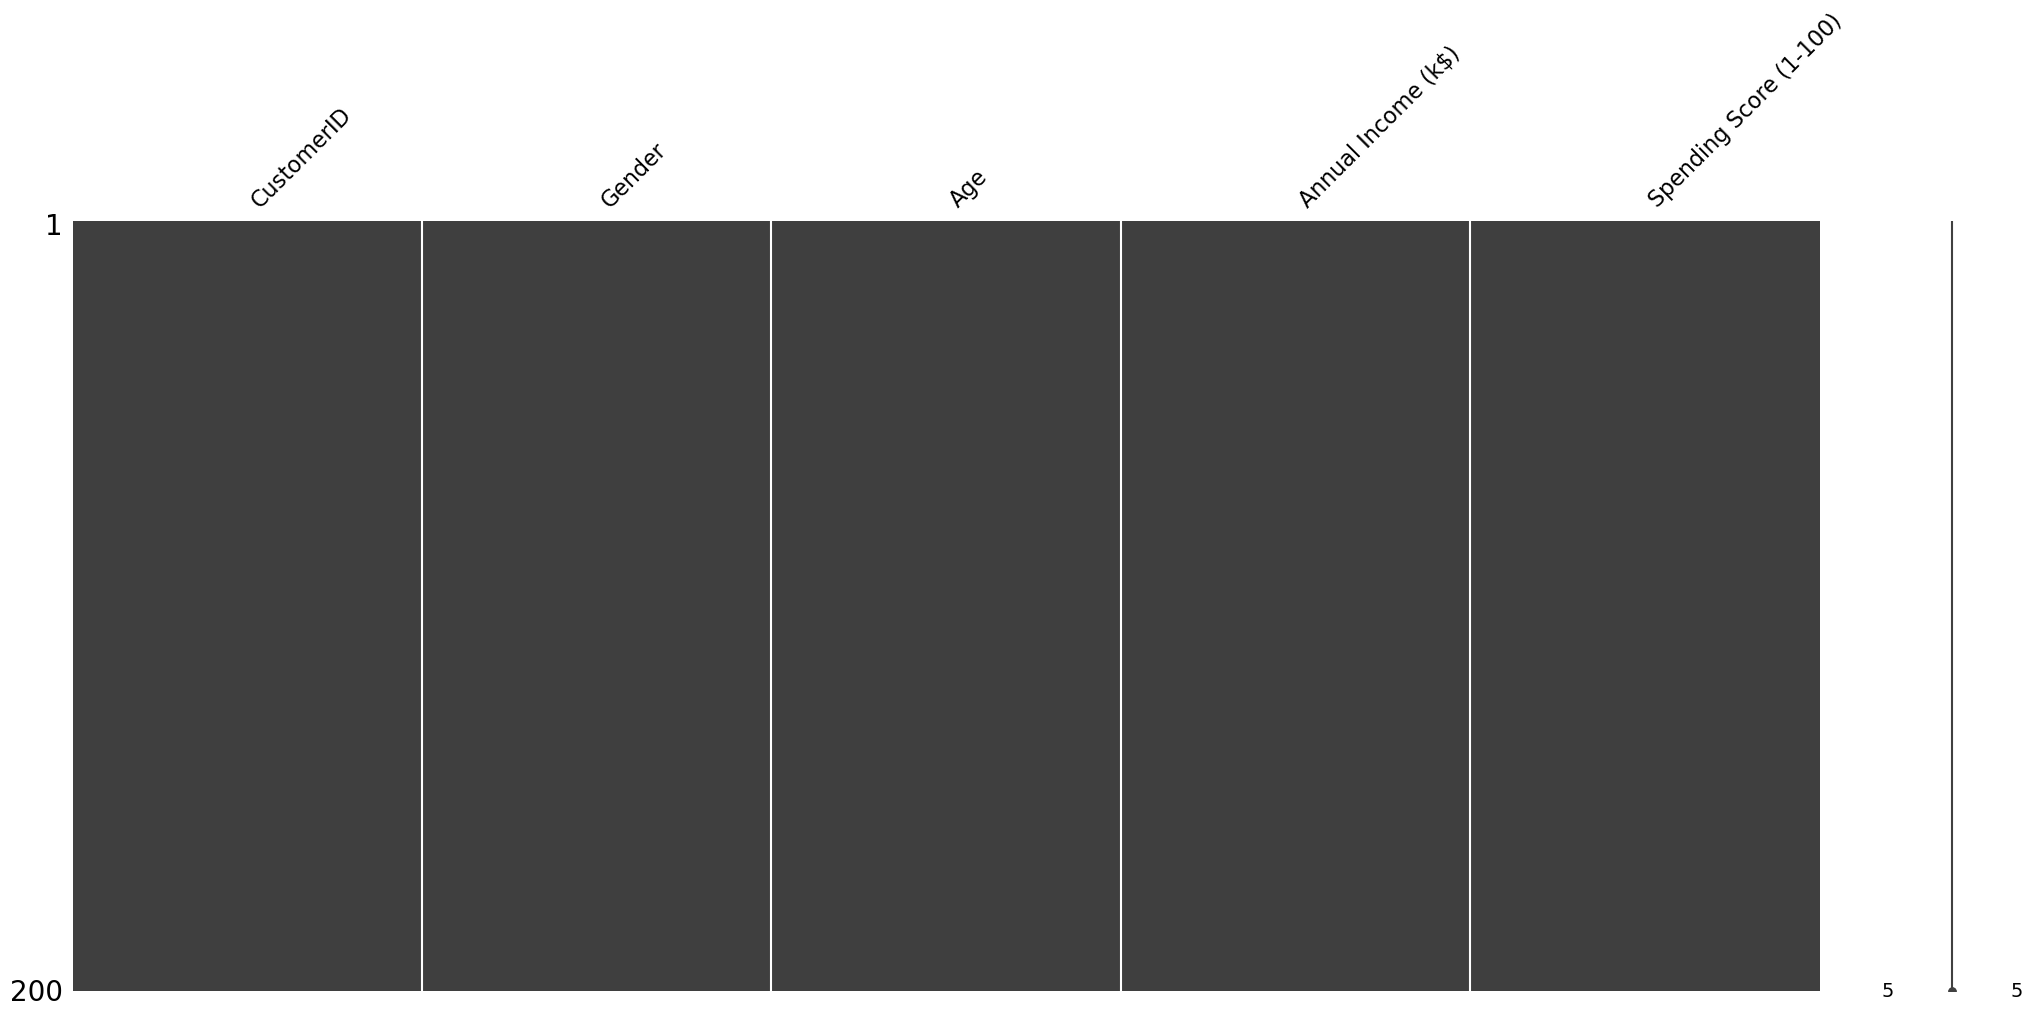

In [25]:
msno.matrix(df)

<Axes: >

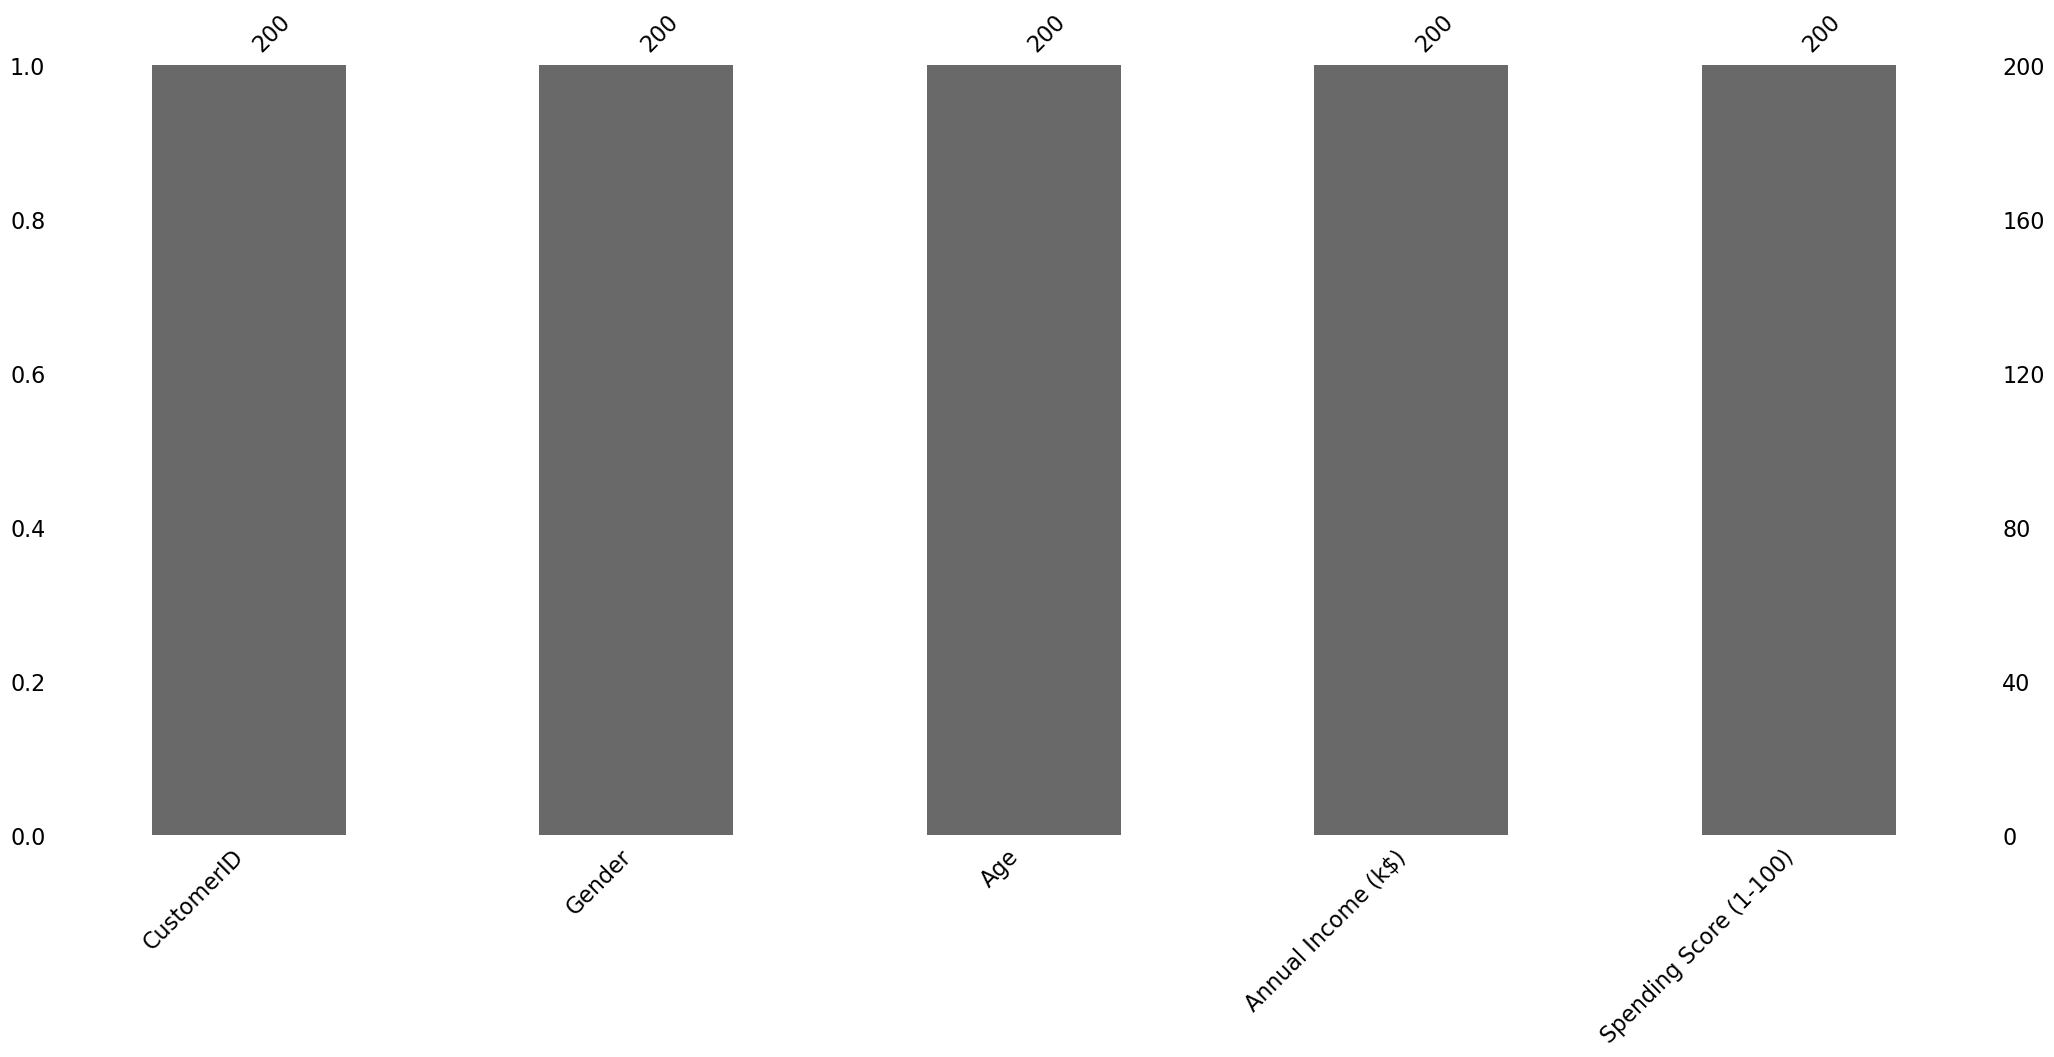

In [24]:
msno.bar(df)

C:\Users\kapil\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\kapil\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

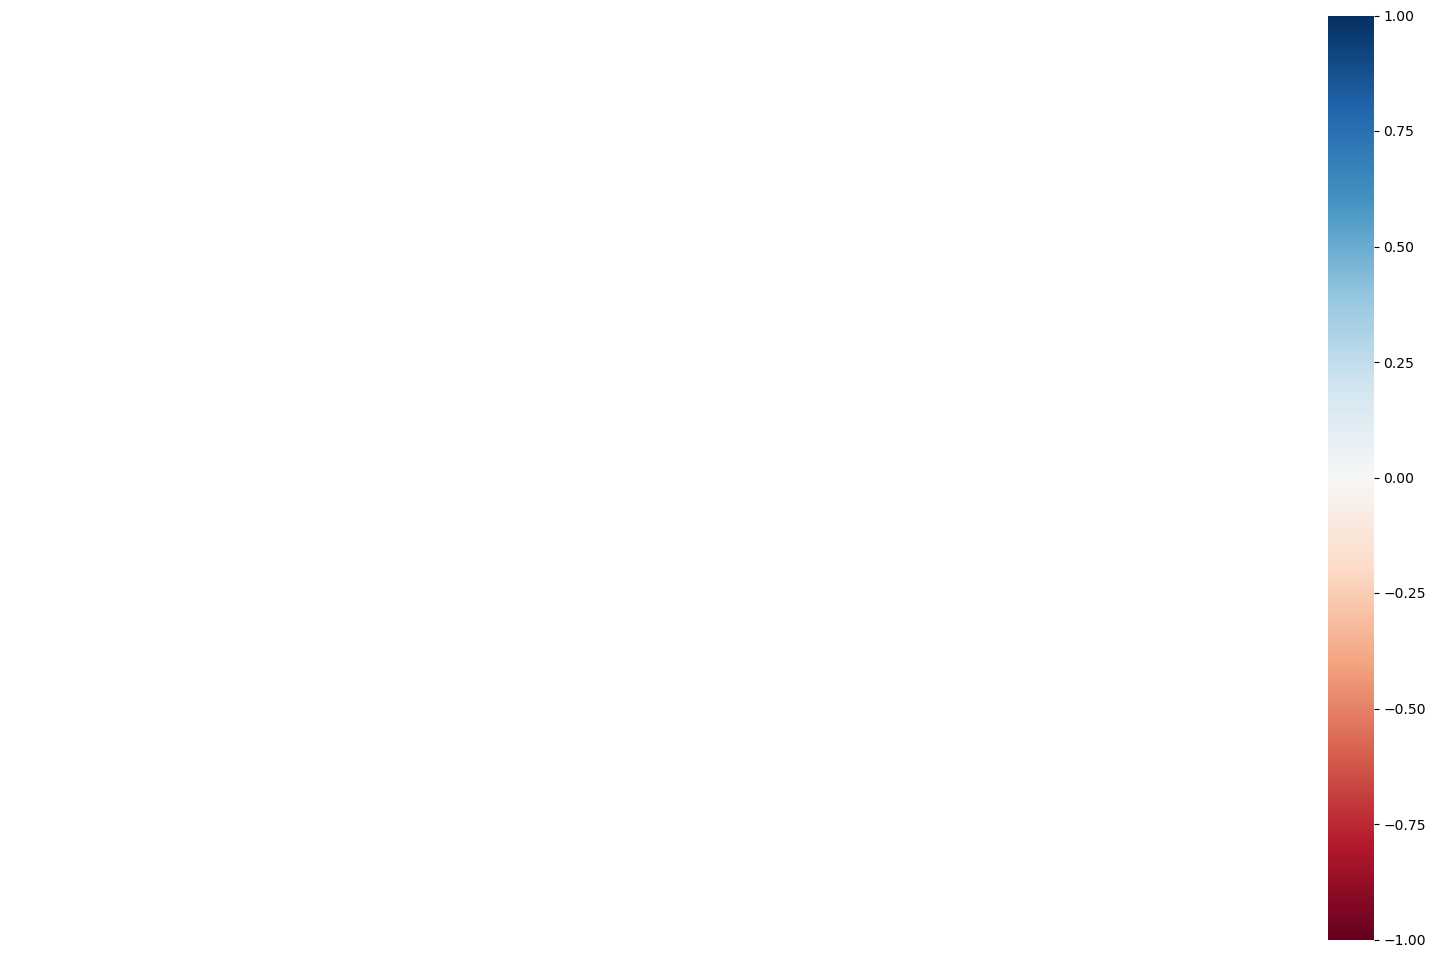

In [26]:
msno.heatmap(df)

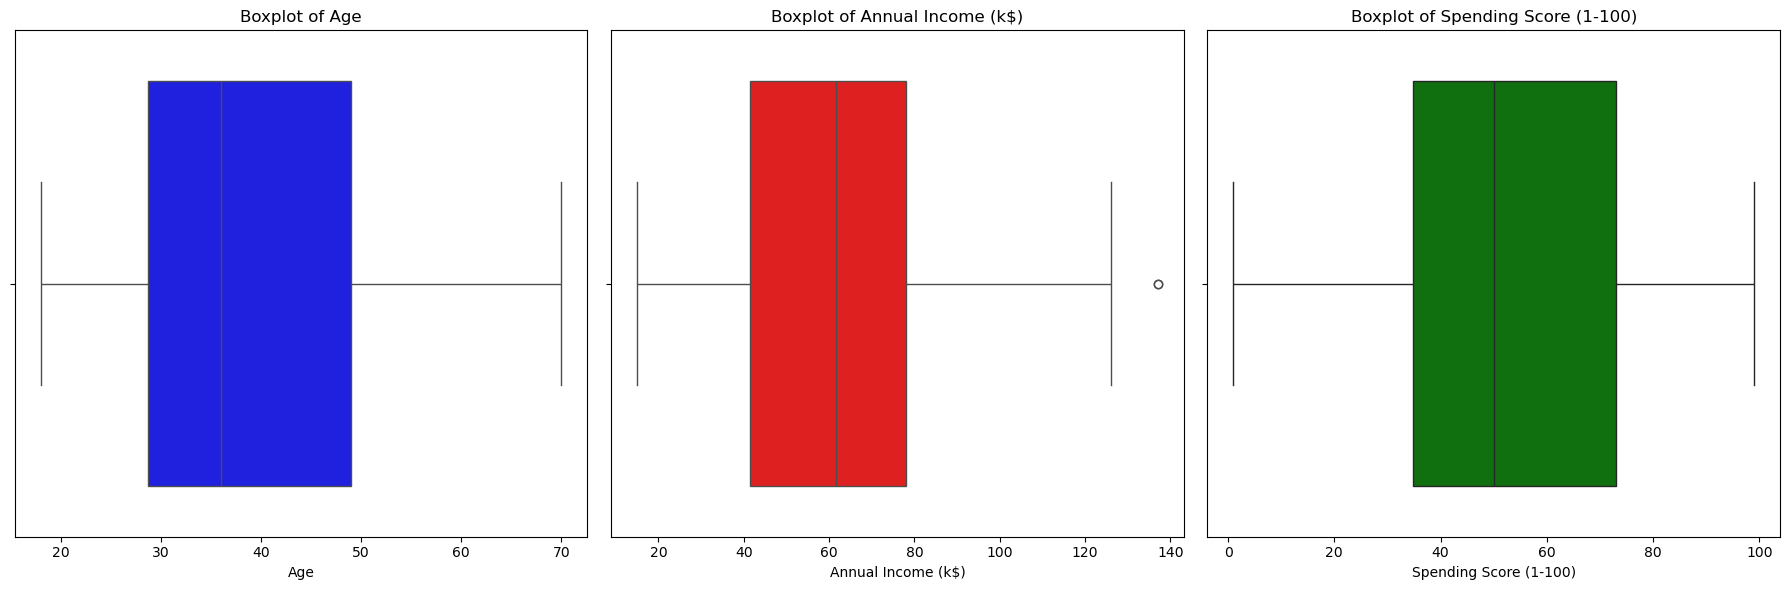

In [34]:
import seaborn as sns
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=data['Age'], color="blue")
plt.title('Boxplot of Age')
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Annual Income (k$)'], color="red")
plt.title('Boxplot of Annual Income (k$)')
plt.subplot(1, 3, 3)
sns.boxplot(x=data['Spending Score (1-100)'], color="green")
plt.title('Boxplot of Spending Score (1-100)')
plt.tight_layout()
plt.show()

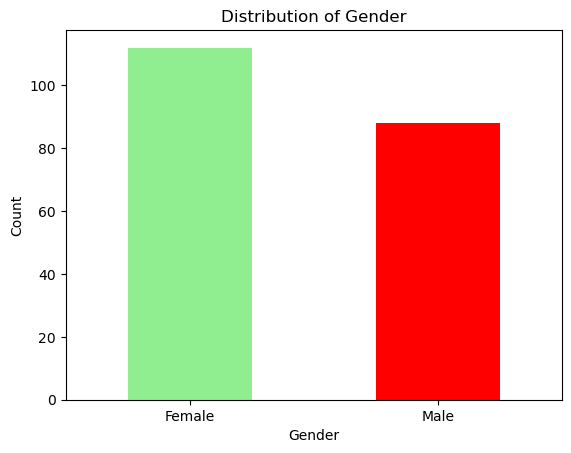

In [39]:
df = data.groupby('Gender').size()
df.plot(kind='bar', color=['lightgreen', 'red'])
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

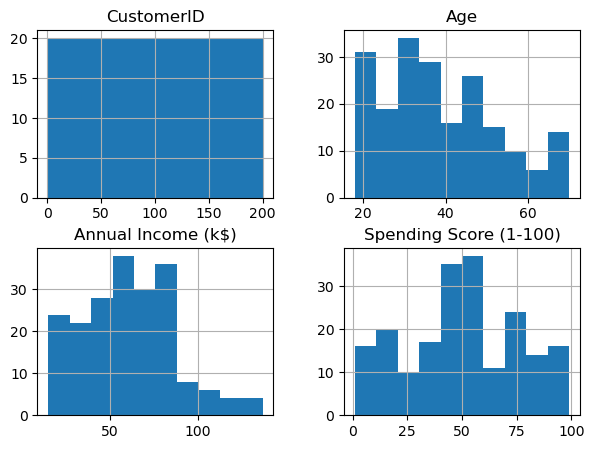

In [42]:
data.hist(figsize=(7,5))
plt.show()

In [43]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\kapil\AppData\Local\Temp\ipykernel_9716\3136600969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette="coolwarm")


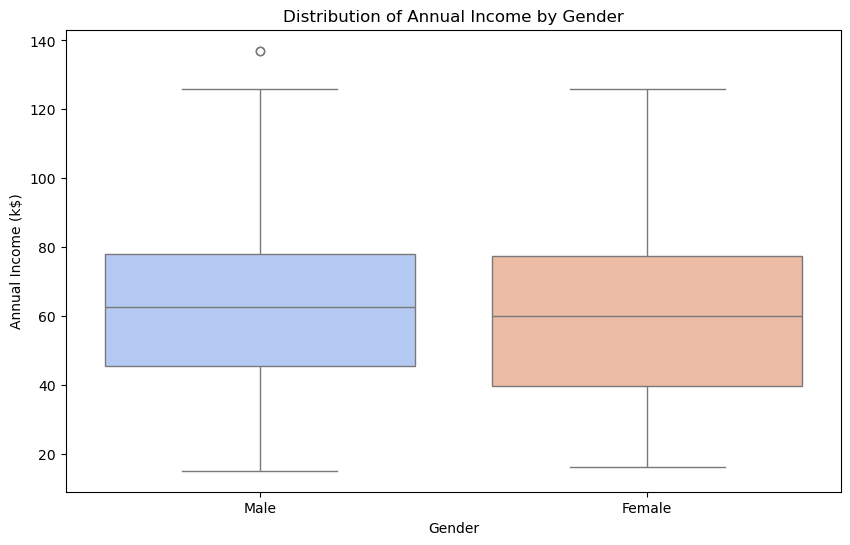

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette="coolwarm")
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Distribution of Annual Income by Gender')
plt.show()

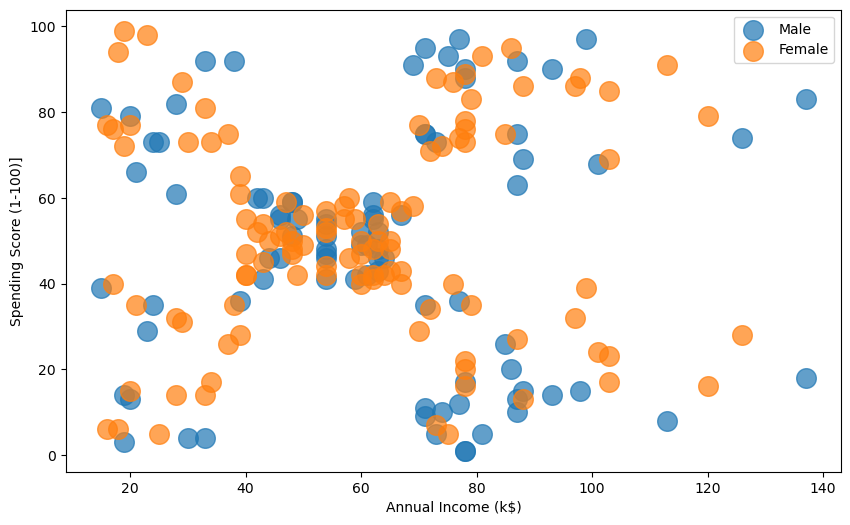

In [45]:
plt.figure(figsize=(10,6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',data=data[data['Gender']==gender],
                s=200,alpha=0.7, label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)]')
plt.legend()
plt.show()

KMEANS

In [46]:
x = data.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
k= []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++')
    kmean.fit(x)
    k.append(kmean.inertia_)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window